<a href="https://colab.research.google.com/github/itsniranjan/Data_Science/blob/main/2_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For matrix operations
import numpy as np
# For plotting
import matplotlib.pyplot as plt

In [ ]:
# For interactive widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

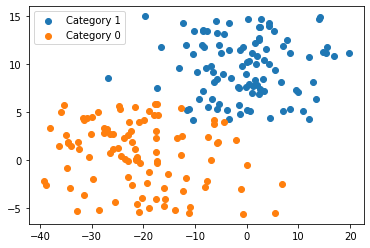

array([[ 9.39995905e-01,  1.11294284e+01],
       [-5.81304008e+00,  5.30976511e+00],
       [ 1.41797488e+01,  1.49388284e+01],
       [-8.46768138e+00,  1.34675698e+01],
       [-1.23735557e+00,  4.80410638e+00],
       [ 8.29676303e+00,  5.28050396e+00],
       [ 1.53404615e+01,  1.11907137e+01],
       [-1.17869863e+01,  1.19347127e+01],
       [ 2.35939343e+00,  1.24435796e+01],
       [ 1.47074339e+01,  1.12035262e+01],
       [ 7.85139965e+00,  1.24729102e+01],
       [ 6.61626046e+00,  8.16061827e+00],
       [-1.85872659e-01,  8.93487601e+00],
       [-3.47208126e+00,  4.30771310e+00],
       [ 9.89404450e+00,  7.11776256e+00],
       [ 2.33944678e+00,  1.26741947e+01],
       [ 3.60577682e-01,  1.03254578e+01],
       [-2.67798107e+01,  8.53512085e+00],
       [-9.70032332e+00,  9.14160960e+00],
       [ 3.29671217e+00,  1.03619250e+01],
       [-1.16485160e+01,  5.19414817e+00],
       [ 1.59972720e+00,  8.28522842e+00],
       [-8.98646852e-01,  9.74060520e+00],
       [-8.

In [ ]:
x1 = np.random.randn(100,1) * 10 
y1 = np.random.uniform(low=4, high=15, size=(100,1))

x0 = np.random.randn(100,1) * 10 - 20
y0 = np.random.uniform(low=-6, high=6, size=(100,1))

data  = np.concatenate((np.concatenate((x1, y1), axis=1), np.concatenate((x0, y0), axis=1)), axis=0)
labels = np.concatenate((np.ones(100), np.zeros(100)))


plt.scatter(x1, y1, label="Category 1")
plt.scatter(x0, y0, label="Category 0")
plt.legend()
plt.show()
data

---
Note : Following 3 sections are for visualization.

In [ ]:
#@title
def vis_boundary(wx, wy, b):  #contour plot
  x_min = min(data[:,0])
  x_max = max(data[:,0])

  y_min = min(data[:,1])
  y_max = max(data[:,1])

  x_arr = np.linspace(x_min, x_max, 25)
  y_arr = np.linspace(y_min, y_max, 25)

  X, Y = np.meshgrid(x_arr, y_arr)

  Z_in = wx*X + wy*Y + b
  Z = sigmoid(Z_in)

  c = plt.contourf(X, Y, Z, cmap='plasma')
  plt.colorbar(c)
  
  inp1 = np.asarray([data[i] for i in range(data.shape[0]) if labels[i]])
  inp0 = np.asarray([data[i] for i in range(data.shape[0]) if not labels[i]])
  
  plt.scatter(inp0[:,0], inp0[:,1], label="Category 0", color="blue")
  plt.scatter(inp1[:,0], inp1[:,1], label="Category 1", color="red")
  plt.legend()
  plt.show()

In [ ]:
#@title
def vis_boundary3D(wx, wy, b, show_points=True):  
  x_min = min(data[:,0])
  x_max = max(data[:,0])

  y_min = min(data[:,1])
  y_max = max(data[:,1])

  x_arr = np.linspace(x_min, x_max, 25)
  y_arr = np.linspace(y_min, y_max, 25)

  X, Y = np.meshgrid(x_arr, y_arr)

  Z_in = wx*X + wy*Y + b
  Z = sigmoid(Z_in)

  inp1 = np.asarray([data[i] for i in range(data.shape[0]) if labels[i]])
  inp0 = np.asarray([data[i] for i in range(data.shape[0]) if not labels[i]])

  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.set_title("Z")
  
  if(show_points):
    ax.scatter(inp0[:,0], inp0[:,1], np.zeros_like(inp0[:,0]), label="Category 0", color="blue")
    ax.scatter(inp1[:,0], inp1[:,1], np.ones_like(inp1[:,0]), label="Category 1", color="red")
  
  ax.legend()
  c = ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.5)
  ax.view_init(20, -70)

  fig.show()
  plt.show()

In [ ]:
#@title
def vis_plane(wx, wy, b, show_points=True):  
  x_min = min(data[:,0])
  x_max = max(data[:,0])

  y_min = min(data[:,1])
  y_max = max(data[:,1])

  x_arr = np.linspace(x_min, x_max, 25)
  y_arr = np.linspace(y_min, y_max, 25)

  X, Y = np.meshgrid(x_arr, y_arr)

  Z_in = wx*X + wy*Y + b

  inp1 = np.asarray([data[i] for i in range(data.shape[0]) if labels[i]])
  inp0 = np.asarray([data[i] for i in range(data.shape[0]) if not labels[i]])

  fig = plt.figure()

  ax = fig.add_subplot(projection='3d')
  ax.set_title("Z_in")
  
  if(show_points):
    ax.scatter(inp0[:,0], inp0[:,1], np.zeros_like(inp0[:,0]), label="Category 0", color="blue")
    ax.scatter(inp1[:,0], inp1[:,1], np.ones_like(inp1[:,0]), label="Category 1", color="red")
  
  ax.plot_wireframe(X, Y, Z_in, linewidth=0.5, color="orange", label="Regression plane")
  ax.plot_wireframe(X, Y, np.zeros_like(X), linewidth=0.2, label="Zero plane")
  ax.legend()
  ax.view_init(20, -70)
  
  fig.show()

In [ ]:
#@title
def vis_all(*args, **kwargs):
  
  vis_plane(*args, **kwargs) #plane before sigmoid
  vis_boundary3D(*args, **kwargs)  #sigmoid visualization
  vis_boundary(*args, **kwargs)   #contour

---

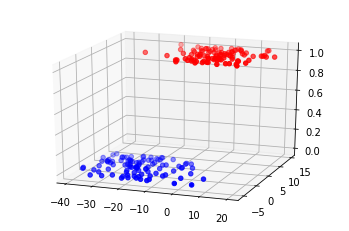

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(x1, y1, np.ones_like(x1), color="r", label="Category 1")
ax.scatter(x0, y0, np.zeros_like(x0), color="b", label="Category 0")
ax.view_init(20, -70)

In [ ]:
interact(vis_plane, 
         wx = widgets.BoundedFloatText(min=-1, max=1, value=0.1, step=0.01), 
         wy = widgets.BoundedFloatText(min=-1, max=11, value=0.1, step=0.01), 
         b = widgets.BoundedFloatText(min=-5, max=5, value=0, step=0.01),
         show_points=True)

interactive(children=(BoundedFloatText(value=0.1, description='wx', max=1.0, min=-1.0, step=0.01), BoundedFloa…

<function __main__.vis_plane>

---
# Concept of activation function

We cannot use a straight plane for this problem because we need output in the range 0 to 1

So, basically an activation function takes a linear input and gives non-linear output.  It either 'activates' (1) or doesn't activate (0)

So, we pass the straight plane through a function called ```sigmoid```  function (or ```logistic``` function)

\\[ s(x) = \frac{1}{1 + e^{-x}} \\]

The derivative is :
\\[ \dot{s}(x) = s(x) \times (1 - s(x)) \\]

In [ ]:
def sigmoid(inp):
  return 1/(1 + np.exp(-inp))

def d_sigmoid(inp):
  return sigmoid(inp) * (1 - sigmoid(inp))

### You might be thinking : Why not the step function? 


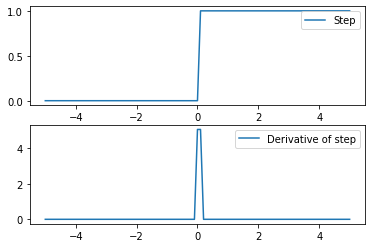

In [ ]:
temp = np.linspace(-5, 5, 101)

step = (temp > 0).astype(np.int)  
d_step = np.gradient(step)/(10/101)  # approximated to delta(y)/delta(x)

plt.subplot(211)
plt.plot(temp, step, label="Step")
plt.legend()

plt.subplot(212)
plt.plot(temp, d_step, label="Derivative of step")
plt.legend()
plt.show()

###These are indeed great ideas to limit the value between 0 and 1
But then, 

- suppose wx=3, wy=4 and b=5, we got z= 1
 and when wx=3.5, wy=4.5 and b=5 also, we got z= 1.
  So which case is better? 

- Also mathematically looking, the slope of step function is so steep that it will affect the gradient descent adversely.



---
SIGMOID TAKES CARE OF ALL THESE ☺


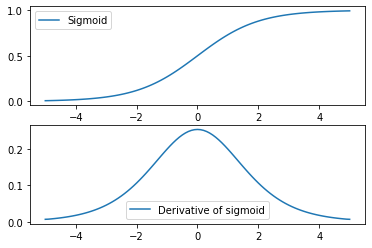

In [ ]:
sig   = sigmoid(temp)
d_sig = np.gradient(sig)/(10/101)

plt.subplot(211)  #two rows and 1 column, and plot in the first plot
plt.plot(temp, sig, label="Sigmoid")
plt.legend()

plt.subplot(212)
plt.plot(temp, d_sig, label="Derivative of sigmoid")
plt.legend()
plt.show()

---

In [ ]:
interact(vis_all, 
         wx = widgets.BoundedFloatText(min=-10, max=10, value=1, step=0.2), 
         wy = widgets.BoundedFloatText(min=-10, max=10, value=1, step=0.2), 
         b = widgets.BoundedFloatText(min=-50, max=50, value=0, step=0.2))


interactive(children=(BoundedFloatText(value=1.0, description='wx', max=10.0, min=-10.0, step=0.2), BoundedFlo…

<function __main__.vis_all>

###Note -
Z_in the predicted output before it is passed through the signoid function 

Z is predicted output after it is passed through the signoid function


<h1>
In linear regression, we had the mean squared error cost function.
But when it comes to logistic, things are different as our purpose itself is different. 
</h1>

When y=1, error is max when our prediction is 0 and min when it is 1. So, our the cost function must cease error when our prediction approaches 1

Similarly for y=0, error is max when our prediction is 1 and min when it is 0. So, our the cost function must cease error when our prediction approaches 0

---




---
# Binary crossentropy loss  --  a.k.a logloss

\\[ E(y, \hat{y}) = (\hat{y} \times -\log{y}) + ((1 - \hat{y}) \times - \log{(1-y)}) \\]

That does look quite intimidating! But, we can make sense of it. Consider this :


Here,  $ \hat{y}_i $ is the actual value and  {y} the value we predicted



$ \hat{y}_i $ can only have values 0 or 1. So, either one of the terms $(\hat{y} \times -\log{y})$ or $((1 - \hat{y}) \times - \log{(1-y)})$ appear at one time 

- When $ \hat{y} = 1 , E(y, \hat{y}) = -log(y) $

- When $ \hat{y} = 0 , E(y, \hat{y}) = -log(1 - y) $

For gradient descent, we need to know its gradient. It comes out to be :

\\[ \frac{\partial E (y, \hat{y})}{\partial y} = \frac{-\hat{y}}{y} + \frac{1-\hat{y}}{1-y} \\]

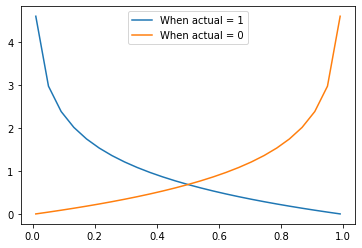

In [ ]:
def log_loss(actual, predicted, epsilon=1e-5):  #10^(-5)  we add this to prevent infinite values
  return -(actual * np.log(predicted + epsilon))-((1-actual)*np.log(1-predicted + epsilon))

def d_log_loss(actual, predicted, epsilon=1e-5):
  return -actual / (predicted + epsilon) + (1 - actual)/(1 - predicted + epsilon)

temp = np.linspace(0.01, 0.99, 25)
plt.plot(temp, log_loss(np.ones_like(temp), temp), label="When actual = 1")  # actual =1, predicted = temp
plt.plot(temp, log_loss(np.zeros_like(temp), temp), label="When actual = 0")  # actual =0, predicted = temp
plt.legend()
plt.show()

---
# Logistic regression

### Forward pass :

![Logistic regression image](https://github.com/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/docs/logistic_regression.png?raw=1)

input to sigmoid


\\[ z\_in = (x \times Wx + y \times Wy + B)\\]

output from sigmoid


\\[ z = s(z\_in) = \frac{1}{1 + e^{-z\_in}}\\]


log loss 


\\[ E(z, \hat{z}) = ((\hat{z} \times -\log{z}) + ((1-\hat{z}) \times -\log(1-z))) \\]




##Now we'll calculate the gradient and go back and correct




### Backward pass :

![Logistic regresssion backward pass image](https://github.com/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/docs/logistic_regression_back.png?raw=1)

 Derivative of loss function

\\[ \frac{\partial E}{\partial z} = \frac{-\hat{z}}{z} + \frac{1-\hat{z}}{1-z}\\]
 
 Derivative of Logistic function


\\[ \frac{\partial E}{\partial z\_in} = \frac{\partial E}{\partial z} \times \frac{d z}{d z\_in} = \frac{\partial E}{\partial z} \times z \times (1-z) \\]   
<br>
(remember derivative of sigmoid [  i.e s(x)  ] is s(x)(1 - s(x))
<br>
Derivative w.r.t Wx


\\[ \frac{\partial E}{\partial W_x} = \frac{\partial E}{\partial z\_in} \times \frac{\partial z\_in}{\partial W_x} = \frac{\partial E}{\partial z\_in} \times x\\]

Derivative w.r.t Wy


\\[ \frac{\partial E}{\partial W_y} = \frac{\partial E}{\partial z\_in} \times \frac{\partial z\_in}{\partial W_y} = \frac{\partial E}{\partial z\_in} \times y\\]

Derivative w.r.t b


\\[ \frac{\partial E}{\partial B} = \frac{\partial E}{\partial z\_in} \times \frac{\partial z\_in}{\partial B} = \frac{\partial E}{\partial z\_in}\\]

In our code,

- ```d_z``` = $ \frac{\partial E}{\partial z} $

- ```d_zin``` = $ \frac{\partial E}{\partial z\_in} $

- ```d_wx``` = $ \frac{\partial E}{\partial Wx} $

- ```d_wy``` = $ \frac{\partial E}{\partial Wy} $

- ```d_b``` = $ \frac{\partial E}{\partial B} $
<br>
Finally, <br>
-```wx``` = ```wx``` - learning_rate * np.mean(```d_wx```) <br>
-```wy``` = ```wy``` - learning_rate * np.mean(```d_wy```) <br>
-```b```  = ```b```  - learning_rate * np.mean(```d_b```)


 Error 5.174 


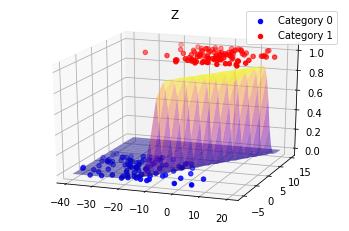

 Error 4.683 


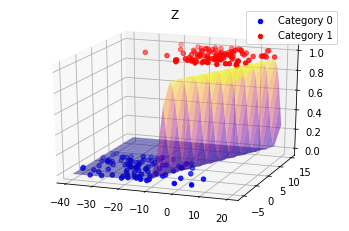

 Error 4.102 


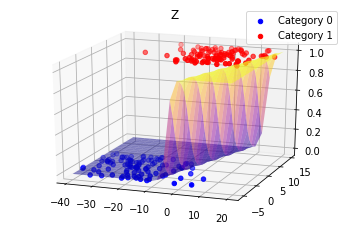

 Error 3.268 


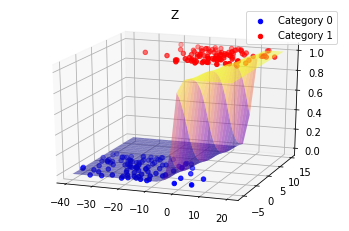

 Error 2.313 


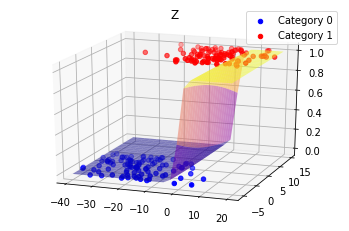

 Error 1.420 


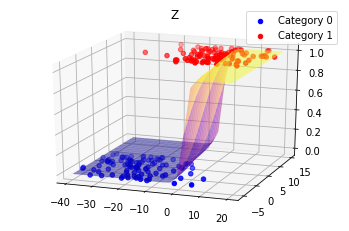

 Error 0.547 


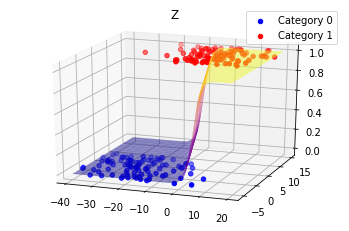

 Error 0.174 


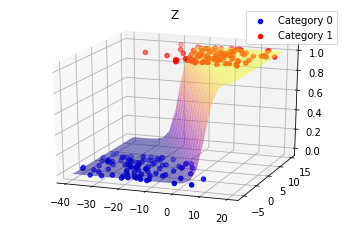

 Error 0.095 


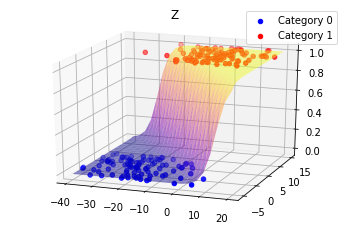

 Error 0.071 


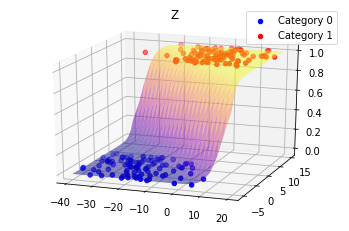

 Error 0.065 


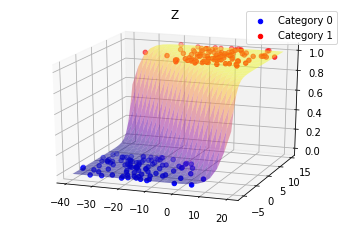

 Error 0.065 


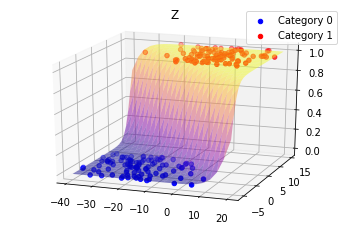

 Error 0.065 


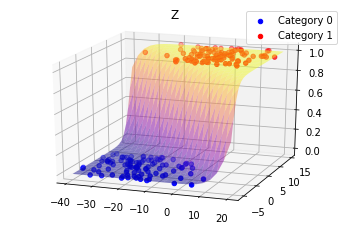

 Error 0.065 


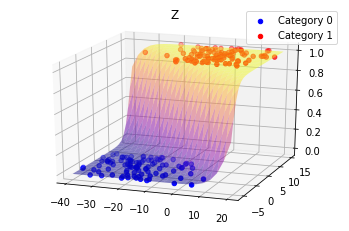

 Error 0.065 


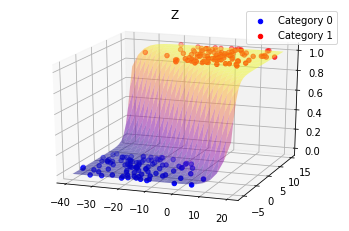

 Error 0.065 


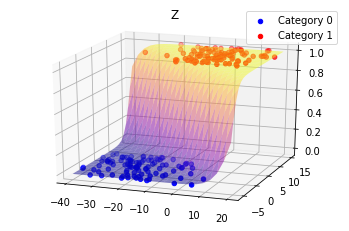

 Error 0.065 


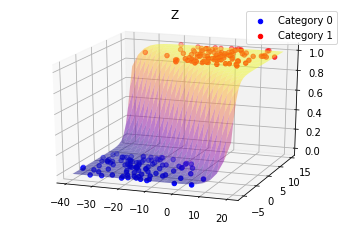

 Error 0.064 


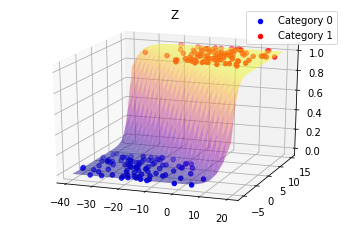

 Error 0.064 


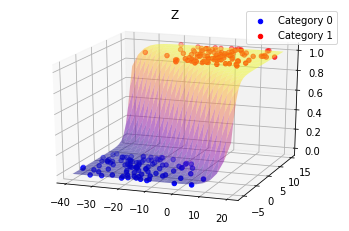

 Error 0.064 


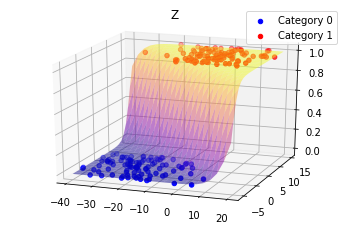

In [ ]:
# First, initialize slope and intercept randomly
wx = np.random.randn()
wy = np.random.randn()
b  = np.random.randn()

# Number of iterations
num_iter = 20

# Learning rate is the factor that is multiplied with the gradient
learning_rate = 2e-1       # Optimum rate from trial and error

# To store values of slope, intercept and error over training, for visualizing later
param_hist = []
error_hist = []

# Start training
for i in range(num_iter):
  z_in = wx * data[:,0] + wy * data[:,1] + b
  z    = sigmoid(z_in)

  # Compute error
  error = np.average(log_loss(labels, z))
  print(" Error %.3f "%(error))

  # Visualize the current prediction
  # vis_boundary(wx, wy, b)               # View in 2D
  vis_boundary3D(wx, wy, b)             # View in 3D
  
  # Append to history to visualize later
  param_hist.append([wx, wy, b])
  error_hist.append(error)

  # Derivative of error with respect to z
  d_z = d_log_loss(labels, z)

  # Back propagate through sigmoid function
  d_zin = d_z * d_sigmoid(z_in)
  
  # Derivative of errors with respect to slopes and intercepts
  d_wx = d_zin * data[:,0]
  d_wy = d_zin * data[:,1]
  d_b  = d_zin

  # Update predictions by gradient descent rule
  wx = wx - learning_rate * np.mean(d_wx)
  wy = wy - learning_rate * np.mean(d_wy)
  b  = b  - learning_rate * np.mean(d_b)

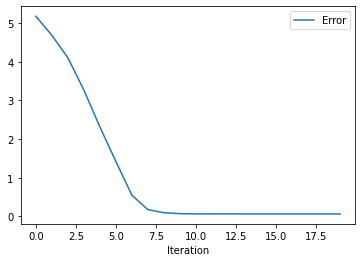

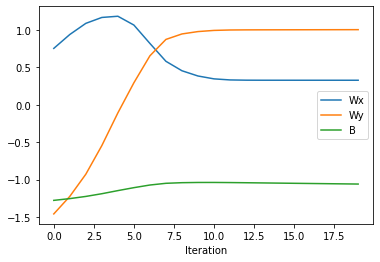

In [ ]:
plt.plot(error_hist, label="Error")
plt.xlabel("Iteration")
plt.legend()
plt.show()

plt.plot([params[0] for params in param_hist], label="Wx")
plt.plot([params[1] for params in param_hist], label="Wy")
plt.plot([params[2] for params in param_hist], label="B")
plt.xlabel("Iteration")
plt.legend()
plt.show()

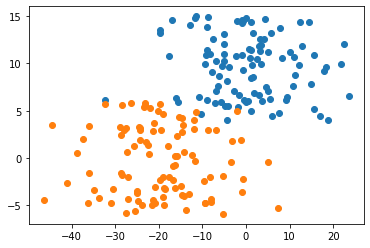

In [ ]:
test_size = 100

x_test1 = np.random.randn(test_size,1) * 10 
y_test1 = np.random.uniform(low=4, high=15, size=(test_size,1))

x_test0 = np.random.randn(test_size,1) * 10 - 20
y_test0 = np.random.uniform(low=-6, high=6, size=(test_size,1))

test_data  = np.concatenate((np.concatenate((x_test1, y_test1), axis=1), np.concatenate((x_test0, y_test0), axis=1)), axis=0)
test_labels = np.concatenate((np.ones(test_size), np.zeros(test_size)))

plt.scatter(x_test1, y_test1, label="Category 1")
plt.scatter(x_test0, y_test0, label="Category 0")

In [ ]:
def test(input, target, w_x, w_y, b):
  z_in = wx * input[:,0] + wy * input[:,1] + b
  z    = sigmoid(z_in)

  z_thresh = (z > 0.5).astype(int)

  correct  = (z_thresh == target)
  
  return np.count_nonzero(correct) / len(target)

In [ ]:
test(data, labels, wx, wy, b)

0.965

In [ ]:
test(test_data, test_labels, wx, wy, b)

0.97